# Statistics

## Anecdotal Evidence

Anecdotal evidence is evidence from anecdotes: evidence collected in a casual or informal manner and relying heavily or entirely on personal testimony.

Anecdotal evidence usually fails, because:
*  Small number of observations
* Selection bias: people who join a discussion of some question might be interested because their they had similar experiences. In that case the process of selecting data would bias the results.
* Confirmation bias: People who believe the claim might be more likely to contribute examples that confirm it. People who doubt the claim are more likely to cite counterexamples.
* Inaccuracy: Anecdotes are often personal stories, and often misremembered, misrepresented, repeated inaccurately, etc.


To address the limitations of anecdotes, we use the tools of statistics, which include:
* Data collection: We use data from a large survey that was designed explicitly with the goal of generating statistically valid inferences.
* Descriptive statistics: We generate statistics that summarize the data concisely, and evaluate different ways to visualize data.
* Exploratory data analysis: We look for patterns, differences, and other features that address the questions we are interested in. At the same time we will check for inconsistencies and identify limitations.
* Estimation: We use data from a sample to estimate characteristics of the general population.
* Hypothesis testing: Where we see apparent effects, like a difference between two groups, we will evaluate whether the effect might have happened by chance.

By performing these steps with care to avoid pitfalls, we can reach conclusions that are more justifiable and more likely to be correct.

## The National Survey of Family Growth

Since 1973 the U.S. Centers for Disease Control and Prevention (CDC) have conducted the National Survey of Family Growth (NSFG), which is intended to gather "nformation on family life, marriage and divorce, pregnancy, infertility, use of contraception, and men's and women's health. The survey results are used to plan health services and health education programs, and to do statistical studies of families, fertility, and health.

We will use data collected by this survey to investigate whether first babies tend to come late, and other questions.

In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = 250

In [2]:
df = pd.read_csv('../meta/2002FemPreg.csv')
print(df.shape)
df.head()

(13593, 243)


,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,cmotpreg,prgoutcome,cmprgend,flgdkmo1,cmprgbeg,ageatend,hpageend,gestasun_m,gestasun_w,wksgest,mosgest,dk1gest,dk2gest,dk3gest,bpa_bdscheck1,bpa_bdscheck2,bpa_bdscheck3,babysex,birthwgt_lb,birthwgt_oz,lobthwgt,babysex2,birthwgt_lb2,birthwgt_oz2,lobthwgt2,babysex3,birthwgt_lb3,birthwgt_oz3,lobthwgt3,cmbabdob,kidage,hpagelb,birthplc,paybirth1,paybirth2,paybirth3,knewpreg,trimestr,ltrimest,priorsmk,postsmks,npostsmk,getprena,bgnprena,pnctrim,lpnctri,workpreg,workborn,didwork,matweeks,weeksdk,matleave,matchfound,livehere,alivenow,cmkidied,cmkidlft,lastage,wherenow,legagree,parenend,anynurse,fedsolid,frsteatd_n,frsteatd_p,frsteatd,quitnurs,ageqtnur_n,ageqtnur_p,ageqtnur,matchfound2,livehere2,alivenow2,cmkidied2,cmkidlft2,lastage2,wherenow2,legagree2,parenend2,anynurse2,fedsolid2,frsteatd_n2,frsteatd_p2,frsteatd2,quitnurs2,ageqtnur_n2,ageqtnur_p2,ageqtnur2,matchfound3,livehere3,alivenow3,cmkidied3,cmkidlft3,lastage3,wherenow3,legagree3,parenend3,anynurse3,fedsolid3,frsteatd_n3,frsteatd_p3,frsteatd3,quitnurs3,ageqtnur_n3,ageqtnur_p3,ageqtnur3,cmlastlb,cmfstprg,cmlstprg,cmintstr,cmintfin,cmintstrop,cmintfinop,cmintstrcr,cmintfincr,evuseint,stopduse,whystopd,whatmeth01,whatmeth02,whatmeth03,whatmeth04,resnouse,wantbold,probbabe,cnfrmno,wantbld2,timingok,toosoon_n,toosoon_p,wthpart1,wthpart2,feelinpg,hpwnold,timokhp,cohpbeg,cohpend,tellfath,whentell,tryscale,wantscal,whyprg1,whyprg2,whynouse1,whynouse2,whynouse3,anyusint,prglngth,outcome,birthord,datend,agepreg,datecon,agecon,fmarout5,pmarpreg,rmarout6,fmarcon5,learnprg,pncarewk,paydeliv,lbw1,bfeedwks,maternlv,oldwantr,oldwantp,wantresp,wantpart,cmbirth,ager,agescrn,fmarital,rmarital,educat,hieduc,race,hispanic,hisprace,rcurpreg,pregnum,parity,insuranc,pubassis,poverty,laborfor,religion,metro,brnout,yrstrus,prglngth_i,outcome_i,birthord_i,datend_i,agepreg_i,datecon_i,agecon_i,fmarout5_i,pmarpreg_i,rmarout6_i,fmarcon5_i,learnprg_i,pncarewk_i,paydeliv_i,lbw1_i,bfeedwks_i,maternlv_i,oldwantr_i,oldwantp_i,wantresp_i,wantpart_i,ager_i,fmarital_i,rmarital_i,educat_i,hieduc_i,race_i,hispanic_i,hisprace_i,rcurpreg_i,pregnum_i,parity_i,insuranc_i,pubassis_i,poverty_i,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,1.0,1093.0,NaN,1084.0,NaN,NaN,9.0,0.0,39.0,9.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,8.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1093.0,138.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1166.0,1093.0,1166.0,920.0,1093.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,1,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,39,1,1.0,1093.0,3316.0,1084,3241,1.0,2.0,1.0,1,NaN,NaN,NaN,2.0,995.0,NaN,1,2,1,2,695,44,44,1,1,16,12,2,2,2,2,2,2,2,2,469,3,2,1,5,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,1.0,1166.0,NaN,1157.0,NaN,NaN,9.0,0.0,39.0,9.0,NaN,NaN,NaN,0.0,NaN,NaN,2.0,7.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1166.0,65.0,42.0,1.0,1.0,2.0,NaN,2.0,NaN,NaN,0.0,5.0,NaN,1.0,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,1.0,4.0,NaN,20.0,1.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1166.0,1093.0,1166.0,1093.0,1166.0,1166.0,1231.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,1,4.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,39,1,2.0,1166.0,3925.0,1157,3850,1.0,2.0,1.0,1,2.0,4.0,3.0,2.0,87.0,0.0,1,4,1,4,695,44,44,1,1,16,12,2,2,2,2,2,2,2,2,469,3,2,1,5,

* caseid is the integer ID of the respondent.
* prglngth is the integer duration of the pregnancy in weeks.
* outcome is an integer code for the outcome of the pregnancy. The code 1 indicates a live birth.
* pregordr is a pregnancy serial number; for example, the code for a respondent's furst pregnancy is 1, for the second pregnancy is 2, and so on.
* birthord is a serial number for live births; the code for a respondent's
* first child is 1, and so on. For outcomes other than live birth, this field is blank.
* birthwgt_lb and birthwgt_oz contain the pounds and ounces parts of the birth weight of the baby.
* agepreg is the mother's age at the end of the pregnancy.
* finalwgt is the statistical weight associated with the respondent. It is a floating-point value that indicates  the number of people in the U.S. population this respondent represents.

**Cleaning**

In [3]:
df.agepreg /= 100.0

na_vals = [97, 98, 99]
df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
df.birthwgt_oz.replace(na_vals, np.nan, inplace=True)

df['totalwgt_lb'] = df.birthwgt_lb + df.birthwgt_oz / 16.0

* agepreg contains the mother's age at the end of the pregnancy. In the data fille, agepreg is encoded as an integer number of centiyears. So we divide each element of agepreg by 100, yielding a floating-point value in years.

* birthwgt_lb and birthwgt_oz contain the weight of the baby, in pounds and ounces, for pregnancies that end in live birth. In addition it uses several special codes:
    * 97 NOT ASCERTAINED
    * 98 REFUSED
    * 99 DON'T KNOW
    
  Special values encoded as numbers are dangerous because if they are not handled properly, they can generate bogus results, like a 99-pound baby.
* The new column totalwgt_lb that combines pounds and ounces into a single quantity, in pounds.

Here is the table for outcome, which encodes the outcome of each pregnancy:

value | label 
---|---
1 | LIVE BIRTH 
2 | INDUCED ABORTION 
3 | STILLBIRTH 
4 | MISCARRIAGE 
5 | ECTOPIC PREGNANCY 
6 | CURRENT PREGNANCY 

In [4]:
df.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

Birth weights

In [5]:
df.birthwgt_lb.value_counts(sort=False)

8.0     1889
7.0     3049
6.0     2223
4.0      229
5.0      697
10.0     132
12.0      10
14.0       3
3.0       98
1.0       40
2.0       53
0.0        8
51.0       1
9.0      623
11.0      26
13.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

if you look more closely, you will notice one value that has to be an error, a 51 pound baby!

In [6]:
df.loc[df.birthwgt_lb > 20, 'birthwgt_lb'] = np.nan

# Distributions

## Histograms
One of the best ways to describe a variable is to report the values that appear in the dataset and how many times each value appears. This description is called the distribution of the variable.

The most common representation of a distribution is a histogram, which is a graph that shows the frequency of each value. In this context, "frequency" means the number of times the value appears.

When you start working with a new dataset, explore the variables you are planning to use one at a time, and a good way to start is by looking at histograms.

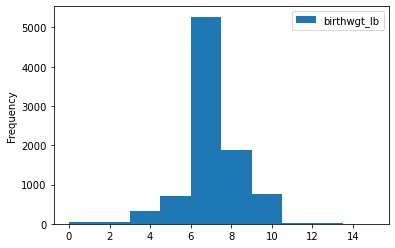

In [7]:
df[['birthwgt_lb']].plot.hist();

The most common value, called the mode, is 7 pounds. The distribution is approximately bell-shaped, which is the shape of the normal distribution, also called a Gaussian distribution. But unlike a true normal distribution, this distribution is asymmetric; it has a tail that extends farther to the left than to the right.

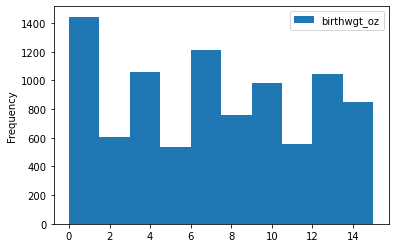

In [8]:
df[['birthwgt_oz']].plot.hist();

In theory we expect this distribution to be uniform; that is, all values should have the same frequency. In fact, 0 is more common than the other values, and 1 and 15 are less common, probably because respondents round off birth weights that are close to an integer value.

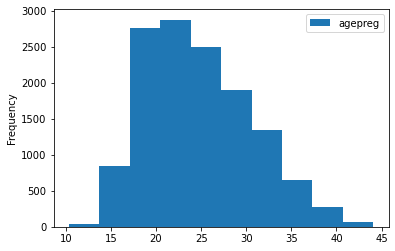

In [9]:
df[['agepreg']].plot.hist();

The mode is 21 years. The distribution is very roughly bell-shaped, but in this case the tail extends farther to the right than left; most mothers are in their 20s, fewer in their 30s.

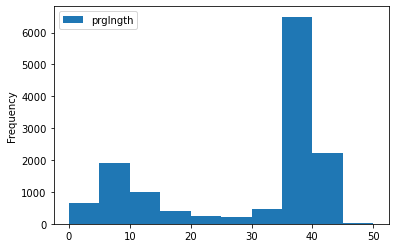

In [10]:
df[['prglngth']].plot.hist();

By far the most common value is 39 weeks. The left tail is longer than the right; early babies are common, but pregnancies seldom go past 43 weeks, and doctors often intervene if they do.

## Outliers
Looking at histograms, it is easy to identify the most common values and the shape of the distribution, but rare values are not always visible. Before going on, it is a good idea to check for outliers, which are extreme values that might be errors in measurement and recording, or might be accurate reports of rare events.

The best way to handle outliers depends on "domain knowledge"; that is, information about where the data come from and what they mean. And it depends on what analysis you are planning to perform.

## Summarizing distributions
A histogram is a complete description of the distribution of a sample; that is, given a histogram, we could reconstruct the values in the sample (although not their order).

If the details of the distribution are important, it might be necessary to present a histogram. But often we want to summarize the distribution with a few descriptive statistics.

Some of the characteristics we might want to report are:
* central tendency: Do the values tend to cluster around a particular point?
* modes: Is there more than one cluster?
* spread: How much variability is there in the values?
* tails: How quickly do the probabilities drop off as we move away from the modes?
* outliers: Are there extreme values far from the modes?
    
Statistics designed to answer these questions are called summary statistics. By far the most common summary statistic is the **mean**, which is meant to describe the central tendency of the distribution.

<center style="font-size:18px"> $ \bar{x} = \frac{1}{n} \sum \limits _{i=1} ^{n} x_{i} $ </center>

The words "mean" and "average" are sometimes used interchangeably, but there is a distinction:
* The "mean" of a sample is the summary statistic computed with the previous formula.
* An "average" is one of several summary statistics you might choose to describe a central tendency.

If there is no single number that summarizes the distribution, we can do a little better with two numbers: mean and variance.
**Variance** is a summary statistic intended to describe the variability or spread of a distribution. The variance of a set of values is

<center style="font-size:18px"> $ \sigma ^{2} = \frac{1}{n} \sum \limits _{i=1} ^{n} (x_{i} - \bar{x})^{2} $ </center>

The term $ x_{i} - \bar{x}^{2} $ is called the "deviation from the mean," so variance is the mean squared deviation. The square root of variance, $ \sigma $, is the standard deviation.

If you have prior experience, you might have seen a formula for variance with n - 1 in the denominator, rather than n. This statistic is used to estimate the variance in a population using a sample.

An **effect size** is a summary statistic intended to describe the size of an effect. For example, to describe the difference between two groups, one obvious choice is the difference in the means.

Mean pregnancy length for first babies is 38.601; for other babies it is 38.523. The difference is 0.078 weeks, which works out to 13 hours. As a fraction of the typical pregnancy length, this dfference is about 0.2%.

If we assume this estimate is accurate, such a difference would have no practical consequences. In fact, without observing a large number of pregnancies, it is unlikely that anyone would notice this difference at all.

Another way to convey the size of the effect is to compare the difference between groups to the variability within groups.

**Cohen's d** is a statistic intended to do that; it is defined as

<center style="font-size:18px"> $ d  = \frac{(\bar{x_{1}} - \bar{x_{2}})}{\sigma}  $ </center>

where $ \bar{x_{1}} $ and $ \bar{x_{2}} $ are the means of the groups and $ \sigma $ is the "pooled standard
deviation".

In [11]:
def CohenEffectSize(group1, group2):
    diff = np.mean(group1)- np.mean(group2)
    var1 = np.var(group1)
    var2 = np.var(group2)
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [12]:
live = df[df.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [13]:
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028882209288160876

# Probability mass functions
Another way to represent a distribution is a probability mass function (PMF), which maps from each value to its probability. A probability is a frequency expressed as a fraction of the sample size, n. To get from frequen cies to probabilities, we divide through by n, which is called normalization.


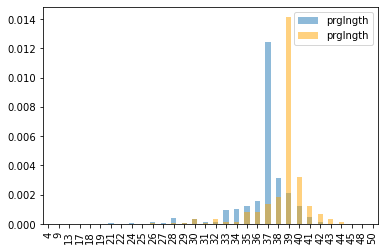

In [14]:
pmf_firsts = (firsts.prglngth.value_counts() / firsts.prglngth.sum()).sort_index()
pmf_others = (others.prglngth.value_counts() / others.prglngth.sum()).sort_index()

pmf_firsts.plot.bar(legend=True, alpha=0.5)
pmf_others.plot.bar(legend=True, color='orange', alpha=0.5);

Histograms and PMFs are useful while you are exploring data and trying to identify patterns and relationships. Once you have an idea what is going on, a good next step is to design a visualization that makes the patterns you have identified as clear as possible.

In the NSFG data, the biggest differences in the distributions are near the mode. So it makes sense to zoom in on that part of the graph, and to transform the data to emphasize differences:

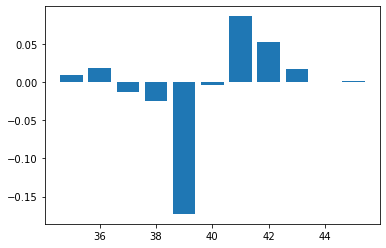

In [15]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = pmf_firsts[week]
    p2 = pmf_others[week]
    diff = 100 * (p1 - p2)
    diffs.append(diff)
plt.bar(weeks, diffs);

This figure makes the pattern clearer: first babies are less likely to be born in week 39, and somewhat more likely to be born in weeks 41 and 42.

If you are given a PMF, you can compute the mean, but the process is slightly different:

<center style="font-size:18px"> $ \bar{x} = \sum \limits _{i=1} ^{n} p_{i} x_{i} $ </center>

Similarly variance can be computed like this:

<center style="font-size:18px"> $ \sigma ^{2} = \sum \limits _{i=1} ^{n} p_{i} (x_{i} - \bar{x}^{2}) $ </center>

PMFs work well if the number of values is small. But as the number of values increases, the probability associated with each value gets smaller and the effect of random noise increases.

# Cumulative distribution functions
PMFs work well if the number of values is small. But as the number of values increases, the probability associated with each value gets smaller and the effect of random noise increases.

For example, we might be interested in the distribution of birth weights.

Overall, these distributions resemble the bell shape of a normal distribution, with many values near the mean and a few values much higher and lower. But parts of this figure are hard to interpret. There are many spikes and valleys, and some apparent differences between the distributions. It is hard to tell which of these features are meaningful. Also, it is hard to see overall patterns; for example, which distribution do you think has the higher mean?

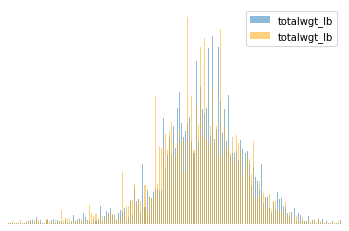

In [16]:
pmf_firsts = (firsts.totalwgt_lb.value_counts() / firsts.totalwgt_lb.sum()).sort_index()
pmf_others = (others.totalwgt_lb.value_counts() / others.totalwgt_lb.sum()).sort_index()

ax1 = pmf_firsts.plot.bar(legend=True, alpha=0.5)
pmf_others.plot.bar(legend=True, color='orange', alpha=0.5);
plt.axis('off');

This figure shows a limitation of PMFs:

They are hard to compare visually. These problems can be mitigated by binning the data; that is, dividing the range of values into non-overlapping intervals and counting the number of values in each bin. Binning can be useful, but it is tricky to get the size of the bins right. If they are big enough to smooth out noise, they might also smooth out useful information.

An alternative that avoids these problems is the cumulative distribution function (CDF)

## Percentiles

The percentile rank is the fraction of people who scored lower than you (or the same).

In [17]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1
    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

If you are given a value, it is easy to nd its percentile rank; going the other way is slightly harder. If you are given a percentile rank and you want to find the corresponding value, one option is to sort the values and search for the one you want:

In [18]:
def Percentile(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[index]

The difference between "percentile" and "percentile rank" can be confusing, and people do not always use the terms precisely. To summarize, PercentileRank takes a value and computes its percentile rank in a set of values; Percentile takes a percentile rank and computes the corresponding value.

**CDF**

The CDF is the function that maps from a value to its percentile rank. The CDF is a function of x, where x is any value that might appear in the distribution. To evaluate CDF(x) for a particular value of x, we compute the fraction of values in the distribution less than or equal to x.

This function is almost identical to PercentileRank, except that the result is a probability in the range 0-1 rather than a percentile rank in the range 0-100.

In [19]:
def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1
    prob = count / len(sample)
    return prob

Percentile can be used to compute percentile-based summary statistics

* The 50th percentile is the value that divides the distribution in half, also known as the median. Like the mean, the median is a measure of the central tendency of a distribution. Actually, there are several definitions of "median," each with different properties. But Percentile(50) is simple and efficient to compute.
* Another percentile-based statistic is the interquartile range (IQR), which is a measure of the spread of a distribution. The IQR is the difference between the 75th and 25th percentiles.

# Modeling distributions

The distributions we have used so far are called empirical distributions because they are based on empirical observations, which are necessarily finite samples.

The alternative is an analytic distribution, which is characterized by a CDF that is a mathematical function. Analytic distributions can be used to model empirical distributions. In this context, a model is a simplification that leaves out unneeded details.

## The exponential distribution
The CDF of the exponential distribution is

<center style="font-size:18px"> $ CDF(x) = 1-e^{-\lambda x} $ </center>

The parameter, $ \lambda $, determines the shape of the distribution.

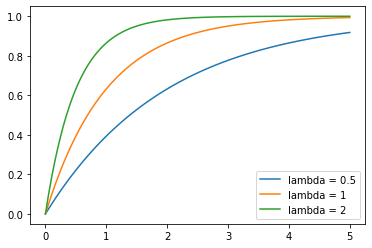

In [20]:
x = np.linspace(0, 5, 100)
plt.plot(x, [1-np.exp(-0.5*i) for i in x], label='lambda = 0.5')
plt.plot(x, [1-np.exp(-1*i) for i in x], label='lambda = 1')
plt.plot(x, [1-np.exp(-2*i) for i in x], label='lambda = 2')
plt.legend();

In the real world, exponential distributions come up when we look at a series of events and measure the times between events, called interarrival times. If the events are equally likely to occur at any time, the distribution of interarrival times tends to look like an exponential distribution.

## The normal distribution
The normal distribution, also called Gaussian, is commonly used because it describes many phenomena, at least approximately. It turns out that there is a good reason for its ubiquity.

The normal distribution is characterized by two parameters: the mean, $ \mu $, and standard deviation $ \sigma $. The normal distribution with $ \mu $ = 0 and $ \sigma $ = 1 is called the standard normal distribution. Its CDF is defined by an integral that does not have a closed form solution, but there are algorithms that evaluate it efficiently

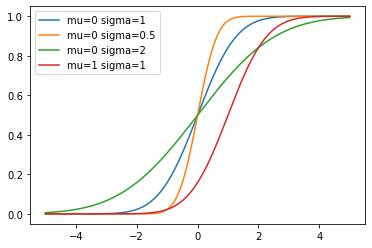

In [21]:
x = np.linspace(-5, 5, 1000)
plt.plot(x, [scipy.stats.norm.cdf(i, 0, 1) for i in x], label='mu=0 sigma=1')
plt.plot(x, [scipy.stats.norm.cdf(i, 0, 0.5) for i in x], label='mu=0 sigma=0.5')
plt.plot(x, [scipy.stats.norm.cdf(i, 0, 2) for i in x], label='mu=0 sigma=2')
plt.plot(x, [scipy.stats.norm.cdf(i, 1, 1) for i in x], label='mu=1 sigma=1')
plt.legend();

## The lognormal distribution
If the logarithms of a set of values have a normal distribution, the values have a lognormal distribution. The CDF of the lognormal distribution is the same as the CDF of the normal distribution, with log x substituted for x.

## The Pareto distribution
The Pareto distribution is named after the economist Vilfredo Pareto, who used it to describe the distribution of wealth. Since then, it has been used to describe phenomena in the natural and social sciences including sizes of cities and towns, sand particles and meteorites, forest fires and earthquakes. The CDF of the Pareto distribution is:

<center style="font-size:18px"> $ CDF(x) = 1 - (\frac{x}{x_{m}})^{-\alpha} $ </center>

The parameters $ x_{m} $ and $ \alpha $ determine the location and shape of the distribution. $ x_{m} $ is the minimum possible value.

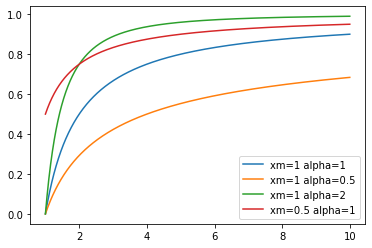

In [22]:
x = np.linspace(1, 10, 1000)
plt.plot(x, [1 - (i/1)**(-1) for i in x], label='xm=1 alpha=1')
plt.plot(x, [1 - (i/1)**(-0.5) for i in x], label='xm=1 alpha=0.5')
plt.plot(x, [1 - (i/1)**(-2) for i in x], label='xm=1 alpha=2')
plt.plot(x, [1 - (i/0.5)**(-1) for i in x], label='xm=0.5 alpha=1')
plt.legend();

# Probability density functions
The derivative of a CDF is called a probability density function, or PDF.

Evaluating a PDF for a particular value of x is usually not useful. The result is not a probability; it is a probability density.

In physics, density is mass per unit of volume; in order to get a mass, you have to multiply by volume or, if the density is not constant, you have to integrate over volume.

Similarly, probability density measures probability per unit of x. In order to get a probability mass, you have to integrate over x.

## Exponential Distribution

<center style="font-size:18px"> $ PDF(x) = \lambda e^{-\lambda x} $ </center>

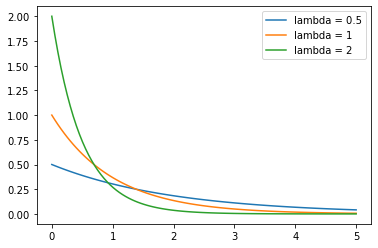

In [23]:
x = np.linspace(0, 5, 100)
plt.plot(x, [0.5*np.exp(-0.5*i) for i in x], label='lambda = 0.5')
plt.plot(x, [np.exp(-1*i) for i in x], label='lambda = 1')
plt.plot(x, [2*np.exp(-2*i) for i in x], label='lambda = 2')
plt.legend();

## Normal Distribution

<center style="font-size:18px"> $ PDF(x) = \frac{1}{{\sigma \sqrt {2\pi } }} e^{-(x-\mu)^{2}/2\sigma^{2}} $ </center>

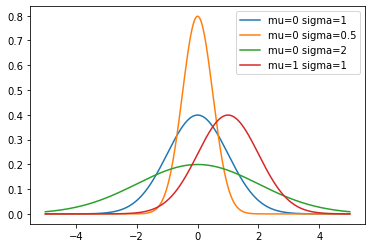

In [24]:
x = np.linspace(-5, 5, 1000)
plt.plot(x, [scipy.stats.norm.pdf(i, 0, 1) for i in x], label='mu=0 sigma=1')
plt.plot(x, [scipy.stats.norm.pdf(i, 0, 0.5) for i in x], label='mu=0 sigma=0.5')
plt.plot(x, [scipy.stats.norm.pdf(i, 0, 2) for i in x], label='mu=0 sigma=2')
plt.plot(x, [scipy.stats.norm.pdf(i, 1, 1) for i in x], label='mu=1 sigma=1')
plt.legend();

## Kernel density estimation
Kernel density estimation (KDE) is an algorithm that takes a sample and finds an appropriately smooth PDF that fits the data.

Estimating a density function with KDE is useful for several purposes:
* Visualization: During the exploration phase of a project, CDFs are usually the best visualization of a distribution. After you look at a CDF, you can decide whether an estimated PDF is an appropriate model of the distribution. If so, it can be a better choice for presenting the distribution to an audience that is unfamiliar with CDFs.
* Interpolation: An estimated PDF is a way to get from a sample to a model of the population. If you have reason to believe that the population distribution is smooth, you can use KDE to interpolate the density for values that don't appear in the sample.
* Simulation: Simulations are often based on the distribution of a sample. If the sample size is small, it might be appropriate to smooth the sample distribution using KDE, which allows the simulation to explore more possible outcomes, rather than replicating the observed data.

## The distribution framework
At this point we have seen PMFs, CDFs and PDFs; let's take a minute to review. 

![img](../meta/distribution-framework.png)

We started with PMFs, which represent the probabilities for a discrete set of values. To get from a PMF to a CDF, you add up the probability masses to get cumulative probabilities. To get from a CDF back to a PMF, you compute differences in cumulative probabilities.

A PDF is the derivative of a continuous CDF; or, equivalently, a CDF is the integral of a PDF. Remember that a PDF maps from values to probability densities; to get a probability, you have to integrate.

To get from a discrete to a continuous distribution, you can perform various kinds of smoothing. One form of smoothing is to assume that the data come from an analytic continuous distribution (like exponential or normal) and to estimate the parameters of that distribution. Another option is kernel density estimation.

The opposite of smoothing is discretizing, or quantizing. If you evaluate a PDF at discrete points, you can generate a PMF that is an approximation of the PDF. You can get a better approximation using numerical integration.

To distinguish between continuous and discrete CDFs, it might be better for a discrete CDF to be a "cumulative mass function" but in actual practice no one uses that term.

## Moments
Any time you take a sample and reduce it to a single number, that number is a statistic. The statistics we have seen so far include mean, variance, median, and interquartile range.
A raw moment is a kind of statistic. If you have a sample of values, $ x_{i} $, the kth raw moment is:

<center style="font-size:18px"> $ m'_{k} = \frac{1}{n} \sum \limits _{i=1} ^{n} x^{k}_{i} $ </center>

In [25]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

When k = 1 the result is the sample mean, $ \bar{x} $. The other raw moments don't mean much by themselves, but they are used in some computations.

The central moments are more useful. The kth central moment is:

<center style="font-size:18px"> $ m_{k} = \frac{1}{n} \sum \limits _{i=1} ^{n} (x_{i} - \bar{x})^{k} $ </center>

In [26]:
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

When k = 2 the result is the second central moment, which you might recognize as variance. The definition of variance gives a hint about why these statistics are called moments. If we attach a weight along a ruler at each location, $ x_{i} $, and then spin the ruler around the mean, the moment of inertia of the spinning weights is the variance of the values.

When you report moment-based statistics, it is important to think about the units. For example, if the values $ x_{i} $ are in cm, the first raw moment is also in cm. But the second moment is in $ cm^{2} $, the third moment is in $ cm^{3} $, and so on.

Because of these units, moments are hard to interpret by themselves. That's why, for the second moment, it is common to report standard deviation, which is the square root of variance, so it is in the same units as $ x_{i} $.

## Skewness
Skewness is a property that describes the shape of a distribution. If the distribution is symmetric around its central tendency, it is unskewed. If the values extend farther to the right, it is "right skewed" and if the values extend left, it is "left skewed."

This use of "skewed" does not have the usual connotation of "biased." Skewness only describes the shape of the distribution; it says nothing about whether the sampling process might have been biased.

Several statistics are commonly used to quantify the skewness of a distribution. Given a sequence of values, $ x_{i} $, the sample skewness, $ g_{1} $, can be computed like this:

In [27]:
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

def Skewness(xs):
    return StandardizedMoment(xs, 3)

$ g_{1} $ is the third standardized moment, which means that it has been normalized so it has no units.

Negative skewness indicates that a distribution skews left; positive skewness indicates that a distribution skews right. The magnitude of g1 indicates the strength of the skewness, but by itself it is not easy to interpret.

In practice, computing sample skewness is usually not a good idea. If there are any outliers, they have a disproportionate efect on $ g_{1} $.

Another way to evaluate the asymmetry of a distribution is to look at the relationship between the mean and median. Extreme values have more effect on the mean than the median, so in a distribution that skews left, the mean is less than the median. In a distribution that skews right, the mean is greater.

**Pearson's median skewness coeffcient** is a measure of skewness based on the difference between the sample mean and median:


<center style="font-size:18px"> $ g_{p} = 3(\bar{x} - m)/S $ </center>

This statistic is robust, which means that it is less vulnerable to the effect of outliers.

In [28]:
def PearsonMedianSkewness(xs):
    median = np.median(xs)
    mean = np.mean(xs)
    std = np.std(xs)
    gp = 3 * (mean - median) / std
    return gp

# Relationships between variables

Two variables are related if knowing one gives you information about the other. For example, height and weight are related; people who are taller tend to be heavier. Of course, it is not a perfect relationship: there are short heavy people and tall light ones. But if you are trying to guess someone's weight, you will be more accurate if you know their height than if you don't.

## Correlation

A correlation is a statistic intended to quantify the strength of the relationship between two variables. A challenge in measuring correlation is that the variables we want to compare are often not expressed in the same units. And even if they are in the same units, they come from different distributions.
 
There are two common solutions to these problems:
1. Transform each value to a standard score, which is the number of standard deviations from the mean. This transform leads to the "Pearson product-moment correlation coeffcient."
2. Transform each value to its rank, which is its index in the sorted list of values. This transform leads to the "Spearman rank correlation coeffcient."

If X is a series of n values, xi, we can convert to standard scores by subtracting the mean and dividing by the standard deviation: $ z_{i} = (x_{i} - \mu)/\sigma $.

The numerator is a deviation: the distance from the mean. Dividing by $ \sigma $ standardizes the deviation, so the values of Z are dimensionless (no units) and their distribution has mean 0 and variance 1.

If X is normally distributed, so is Z. But if X is skewed or has outliers, so does Z; in those cases, it is more robust to use percentile ranks. If we compute a new variable, R, so that $ r_{i} $ is the rank of $ x_{i} $, the distribution of R is uniform from 1 to n, regardless of the distribution of X.

## Covariance
Covariance is a measure of the tendency of two variables to vary together. If we have two series, X and Y , their deviations from the mean are

$ dx_{i} = x_{i} - \bar{x} $

$ dy_{i} = y_{i} - \bar{y} $

If X and Y vary together, their deviations tend to have the same sign. If we multiply them together, the product is positive when the deviations have the same sign and negative when they have the opposite sign. So adding up the products gives a measure of the tendency to vary together.

<center style="font-size:18px"> $ Cov(X, Y) = \frac{1}{n} \sum \limits _{i=1} ^{n} dx_{i}dy_{i}  $ </center>

where n is the length of the two series (they have to be the same length). If you have studied linear algebra, you might recognize that Cov is the dot product of the deviations, divided by their length. So the covariance is maximized if the two vectors are identical, 0 if they are orthogonal, and negative if they point in opposite directions.

In [29]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)
    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

## Pearson's correlation
Covariance is useful in some computations, but it is seldom reported as a summary statistic because it is hard to interpret. Among other problems, its units are the product of the units of X and Y. One solution to this problem is to divide the deviations by the standard deviation, which yields standard scores, and compute the product of standard scores:

<center style="font-size:18px"> $ p_{i} = \frac{(x_{i} - \bar{x})}{S_{x}} \frac{(y_{i} - \bar{y})}{S_{y}}  $ </center>

Where $ S_{x} $ and $ S_{y} $ are the standard deviations of X and Y. The mean of these products is

<center style="font-size:18px"> $ \rho = \frac{1}{n} \sum \limits _{i=1} ^{n} p_{i} $ </center> or
<center style="font-size:18px"> $ \rho = \frac{Cov(X, Y)}{S_{x}S_{y}} $ </center>

This value is called Pearson's correlation after Karl Pearson, an influential early statistician. It is easy to compute and easy to interpret. Because standard scores are dimensionless, so is $ \rho $

In [30]:
def Corr(xs, ys):
    return Cov(xs, ys, np.mean(xs), np.mean(ys)) / np.std(xs) * np.std(ys)

Pearson's correlation is always between -1 and +1 (including both). If it is positive, we say that the correlation is positive, which means that when one variable is high, the other tends to be high. If it is negative, the correlation is negative, so when one variable is high, the other is low.

Its magnitude indicates the strength of the correlation. If it is 1 or -1, the variables are perfectly correlated, which means that if you know one, you can make a perfect prediction about the other.

Most correlation in the real world is not perfect, but it is still useful. The correlation of height and weight is 0.51, which is a strong correlation compared to similar human-related variables.

## Nonlinear relationships
If Pearson's correlation is near 0, it is tempting to conclude that there is no relationship between the variables, but that conclusion is not valid. Pearson's correlation only measures linear relationships. If there's a nonlinear relationship, it understates its strength.

## Spearman's rank correlation
Pearson's correlation works well if the relationship between variables is linear and if the variables are roughly normal. But it is not robust in the presence of outliers. Spearman's rank correlation is an alternative that mitigates the effect of outliers and skewed distributions. To compute Spearman's correlation, we have to compute the rank of each value, which is its index in the sorted sample. For example, in the sample [1, 2, 5, 7] the rank of the value 5 is 3, because it appears third in the sorted list. Then we compute Pearson's correlation for the ranks.

In [31]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

## Correlation and causation
If variables A and B are correlated, there are three possible explanations: A causes B, or B causes A, or some other set of factors causes both A and B. These explanations are called "causal relationships".
Correlation alone does not distinguish between these explanations, so it does not tell you which ones are true. This rule is often summarized with the phrase "Correlation does not imply causation"

# Estimation

In statistics, estimation refers to the process by which one makes inferences about a population, based on information obtained from a sample.

## Biased Variance
While estimating the variance of a distribution, the obvious choice is to use the sample variance, $ S^{2} $, as an estimator.

<center style="font-size:18px"> $ S ^{2} = \frac{1}{n} \sum \limits _{i=1} ^{n} (x_{i} - \bar{x})^{2} $ </center>

For large samples, $ S^{2} $ is an adequate estimator, but for small samples it tends to be too low. Because of this unfortunate property, it is called a biased estimator. An estimator is unbiased if the expected total (or mean) error, after many iterations of the estimation game, is 0. Fortunately, there is another simple statistic that is an unbiased estimator of $ \sigma ^{2} $

<center style="font-size:18px"> $ S ^{2} _{n-1} = \frac{1}{n-1} \sum \limits _{i=1} ^{n} (x_{i} - \bar{x})^{2} $ </center>

# Hypothesis testing

## Classical hypothesis testing

The goal of classical hypothesis testing is to answer the question, "Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?" Here's how we answer that question:
* The first step is to quantify the size of the apparent effect by choosing a test statistic. In the NSFG example, the apparent effect is a difference in pregnancy length between first babies and others, so a natural choice for the test statistic is the difference in means between the two groups.
* The second step is to define a null hypothesis, which is a model of the system based on the assumption that the apparent effect is not real. In the NSFG example the null hypothesis is that there is no difference between first babies and others; that is, that pregnancy lengths for both groups have the same distribution.
* The third step is to compute a p-value, which is the probability of seeing the apparent effect if the null hypothesis is true. In the NSFG example, we would compute the actual difference in means, then compute the probability of seeing a difference as big, or bigger, under the null hypothesis.
* The last step is to interpret the result. If the p-value is low, the effect is said to be statistically significant, which means that it is unlikely to have occurred by chance. In that case we infer that the effect is more likely to appear in the larger population.

The logic of this process is similar to a proof by contradiction. To prove a mathematical statement, A, you assume temporarily that A is false. If that assumption leads to a contradiction, you conclude that A must actually be true.

Similarly, to test a hypothesis like, "This effect is real," we assume, temporarily, that it is not. That's the null hypothesis. Based on that assumption, we compute the probability of the apparent effect. That's the p-value. If the p-value is low, we conclude that the null hypothesis is unlikely to be true.

In [32]:
class HypothesisTest():
    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)
    
    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) for _ in range(iters)]
        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters
    
    def TestStatistic(self, data):
        raise UnimplementedMethodException()
    
    def MakeModel(self):
        pass
    
    def RunModel(self):
        raise UnimplementedMethodException()

HypothesisTest is an abstract parent class that provides complete defnitions for some methods and place-keepers for others. Child classes based on HypothesisTest inherit `__init__` and `PValue` and provide `TestStatistic`, `RunModel`, and optionally `MakeModel`.

`__init__` takes the data in whatever form is appropriate. It calls `MakeModel`, which builds a representation of the null hypothesis, then passes the data to `TestStatistic`, which computes the size of the effect in the sample. `PValue` computes the probability of the apparent effect under the null hypothesis. It takes as a parameter iters, which is the number of simulations
to run. The first line generates simulated data, computes test statistics, and stores them in `test_stats`. The result is the fraction of elements in `test_stats` that exceed or equal the observed test statistic, `self.actual`.

As a simple example, suppose we toss a coin 250 times and see 140 heads and 110 tails. Based on this result, we might suspect that the coin is biased; that is, more likely to land heads. To test this hypothesis, we compute the probability of seeing such a difference if the coin is actually fair

In [33]:
from collections import Counter
import random

class CoinTest(HypothesisTest):
    def TestStatistic(self, data):
        heads, tails = data
        test_stat = abs(heads - tails)
        return test_stat
    
    def RunModel(self):
        heads, tails = self.data
        n = heads + tails
        sample = [random.choice('HT') for _ in range(n)]
        hist = Counter(sample)
        data = hist['H'], hist['T']
        return data

In [34]:
ct = CoinTest((140, 110))
ct.PValue()

0.073

The result is about 0.07, which means that if the coin is fair, we expect to see a difference as big as 30 about 7% of the time.

How should we interpret this result? By convention, 5% is the threshold of statistical significance. If the p-value is less than 5%, the effect is considered significant; otherwise it is not.

But the choice of 5% is arbitrary, and (as we will see later) the p-value de- pends on the choice of the test statistics and the model of the null hypothesis. So p-values should not be considered precise measurements.

I recommend interpreting p-values according to their order of magnitude: if the p-value is less than 1%, the effect is unlikely to be due to chance; if it is greater than 10%, the effect can plausibly be explained by chance. P-values between 1% and 10% should be considered borderline. So in this example I conclude that the data do not provide strong evidence that the coin is biased or not

In [35]:
class DiffMeansPermute(HypothesisTest):
    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat
    
    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))
        
    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data        

In [36]:
data = firsts.prglngth.values, others.prglngth.values
ht = DiffMeansPermute(data)
ht.PValue()

0.173

The result is about 0.17, which means that we expect to see a difference as big as the observed effect about 17% of the time. So this effect is not statistically significant.

In [37]:
class CorrelationPermute(HypothesisTest):
    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(Corr(xs, ys))
        return test_stat
    
    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [38]:
live.dropna(subset=['agepreg', 'totalwgt_lb'])
data = live.agepreg.values, live.totalwgt_lb.values
ht = CorrelationPermute(data)
ht.PValue()

0.0

The actual correlation is 0.07. The computed p-value is 0; after 1000 iterations the largest simulated correlation is 0.04. So although the observed correlation is small, it is statistically significant.

This example is a reminder that "statistically significant" does not always mean that an effect is important, or significant in practice. It only means that it is unlikely to have occurred by chance.

In [39]:
class DiceTest(HypothesisTest):
    def TestStatistic(self, data):
        observed = data
        n = sum(observed)
        expected = np.ones(6) * n / 6
        test_stat = sum(abs(observed - expected))
        return test_stat
    
    def RunModel(self):
        n = sum(self.data)
        values = [1, 2, 3, 4, 5, 6]
        rolls = np.random.choice(values, n, replace=True)
        hist = Counter(rolls)
        freqs = list(hist.values())
        return freqs

In [40]:
ht = DiceTest([8, 9, 19, 5, 8, 11])
ht.PValue()

0.135

The p-value for this data is 0.15, which means that if the die is fair we expect to see the observed total deviation, or more, about 15% of the time. So the apparent effect is not statistically significant.

## Chi-squared tests
In the previous section we used total deviation as the test statistic. But for testing proportions it is more common to use the chi-squared statistic:

<center style="font-size:18px"> $ \chi ^{2} = \sum \limits _{i=1} ^{n} \frac{(O_{i} - E_{i})^{2}}{E_{i}} $ </center>

Where $ O_{i} $ are the observed frequencies and $ E_{i} $ are the expected frequencies.

In [41]:
class DiceChiTest(DiceTest):
    def TestStatistic(self, data):
        observed = data
        n = sum(observed)
        expected = np.ones(6) * n / 6
        test_stat = sum((observed - expected)**2 / expected)
        return test_stat

In [42]:
ht = DiceChiTest([8, 9, 19, 5, 8, 11])
ht.PValue()

0.051

Squaring the deviations (rather than taking absolute values) gives more weight to large deviations. Dividing through by expected standardizes the deviations, although in this case it has no effect because the expected frequencies are all equal.

The p-value using the chi-squared statistic is 0.04, substantially smaller than what we got using total deviation, 0.13. If we take the 5% threshold seriously, we would consider this effect statistically signiffcant. But considering the two tests togther, I would say that the results are borderline. I would not rule out the possibility that the die is crooked, but I would not convict the accused cheater.

This example demonstrates an important point: the p-value depends on the choice of test statistic and the model of the null hypothesis, and sometimes these choices determine whether an effect is statistically significant or not.

# Linear Least Squares Fit

Correlation coeffcients measure the strength and sign of a relationship, but not the slope. There are several ways to estimate the slope; the most common is a linear least squares fit. A "linear fit" is a line intended to model the relationship between variables. A "least squares" fit is one that minimizes the mean squared error (MSE) between the line and the data.

Suppose we have a sequence of points, ys, that we want to express as a function of another sequence xs. If there is a linear relationship between xs and ys with intercept inter and slope slope, we expect each y[i] to be

<center style="font-size:18px"> inter + slope * x[i] </center>

But unless the correlation is perfect, this prediction is only approximate. The vertical deviation from the line, or residual, is

<center style="font-size:18px"> res = ys - (inter + slope * xs) </center>

The residuals might be due to random factors like measurement error, or non- random factors that are unknown.

If we get the parameters inter and slope wrong, the residuals get bigger, so it makes intuitive sense that the parameters we want are the ones that minimize the residuals.

We might try to minimize the absolute value of the residuals, or their squares, or their cubes; but the most common choice is to minimize the sum of squared residuals, sum(res^2).

There are three good reasons and one less important one:
* Squaring has the feature of treating positive and negative residuals the same, which is usually what we want.
* Squaring gives more weight to large residuals, but not so much weight that the largest residual always dominates.
* If the residuals are uncorrelated and normally distributed with mean 0 and constant (but unknown) variance, then the least squares fit is alsothe maximum likelihood estimator of inter and slope. See https://en.wikipedia.org/wiki/Linear_regression.
* The values of inter and slope that minimize the squared residuals can be computed effciently.

The last reason made sense when computational efficiency was more important than choosing the method most appropriate to the problem at hand. That's no longer the case, so it is worth considering whether squared residuals are the right thing to minimize.
For example, if you are using xs to predict values of ys, guessing too high might be better (or worse) than guessing too low. In that case you might want to compute some cost function for each residual, and minimize total cost, sum(cost(res)). However, computing a least squares fit is quick, easy and often good enough.

In [43]:
def LeastSquares(xs, ys):
    meanx = np.mean(xs)
    varx = np.var(xs)
    meany = np.mean(ys)
    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx
    return inter, slope

## Goodness of fit
There are several ways to measure the quality of a linear model, or goodness of fit. One of the simplest is the standard deviation of the residuals. If you use a linear model to make predictions, Std(res) is the root mean squared error (RMSE) of your predictions.

**R2 score**